In [8]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import img_as_float
import time as time
from skimage import io
from skimage.external import tifffile
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist
from PIL import Image
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version
%matplotlib inline

In [9]:
image_20 = tifffile.imread('G:\\2016\\Summer\\LungMAP\\Image_data\\E16.5\\2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_003.tif')
image_60 = tifffile.imread('G:\\2016\\Summer\\LungMAP\\Image_data\\E16.5\\2015-04-029_60X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_003.tif')
image_20_gray = rgb2gray(image_20)
image_60_gray = rgb2gray(image_60)


In [10]:
image_20_temp1 = tifffile.imread('G:\\2016\\Summer\\LungMAP\\Image_data\\E16.5\\2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_003.tif')

width,height, color = image_20_temp1.shape

In [11]:
# Delete blue 

for x in range(width):
    for y in range(height):
        r,g,b=image_20_temp1[x,y,0], image_20_temp1[x,y,1], image_20_temp1[x,y,2]
        if (b>r and b>g):
            image_20_temp1[x,y,:] = 0
image_20_temp1_gray = rgb2gray(image_20_temp1)

In [12]:
# Resize image to speed up calculation

img20 = sp.misc.imresize(image_20_gray, 0.1) /255.
X20 = np.reshape(img20, (-1, 1))
img60 = sp.misc.imresize(image_60_gray, 0.10) / 255.
X60 = np.reshape(img60, (-1, 1))
img20_temp1 = sp.misc.imresize(image_20_temp1_gray, 0.1) /255.
X20_temp1 = np.reshape(img20_temp1, (-1, 1))

In [6]:
##############
img20.shape
##############

(247, 247)

In [13]:
connectivity20 = grid_to_graph(*img20.shape)
connectivity60 = grid_to_graph(*img60.shape)
connectivity20_temp1 = grid_to_graph(*img20_temp1.shape)

In [14]:
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()

n_clusters = 150  # number of regions
img_temp = img20
X_temp = X20
connectivity_temp = connectivity20

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity_temp)
ward.fit(X_temp)
label = np.reshape(ward.labels_, img_temp.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)


Compute structured hierarchical clustering...
Elapsed time:  8.47657585144043
Number of pixels:  61009
Number of clusters:  150


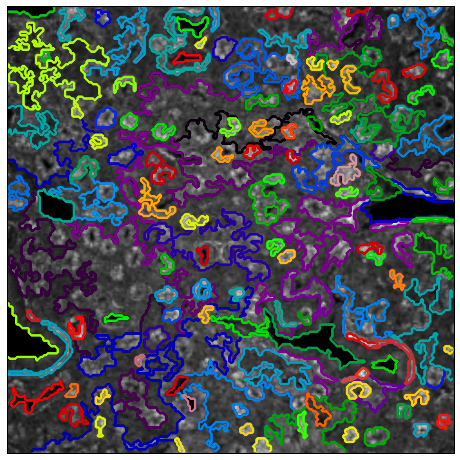

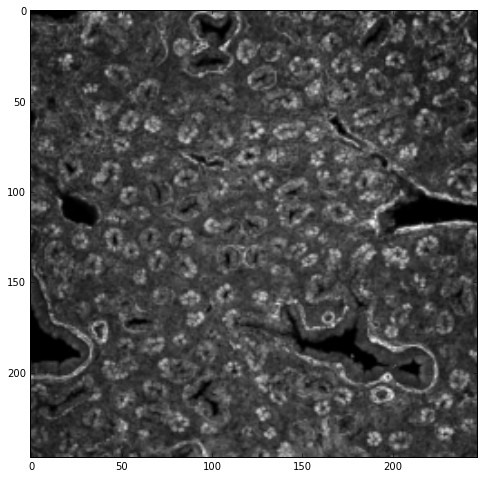

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img_temp, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(img_temp,cmap='gray')

In [ ]:
####################Testing with no blue image########################

In [8]:
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()

n_clusters = 150  # number of regions
img_temp = img20_temp1
X_temp = X20_temp1
connectivity_temp = connectivity20_temp1

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity_temp)
ward.fit(X_temp)
label = np.reshape(ward.labels_, img_temp.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)


Compute structured hierarchical clustering...
Elapsed time:  66.28330659866333
Number of pixels:  61009
Number of clusters:  150


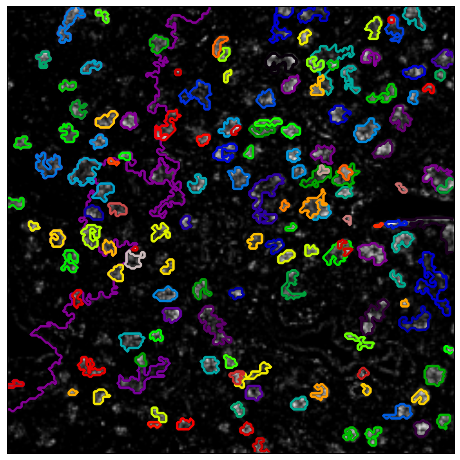

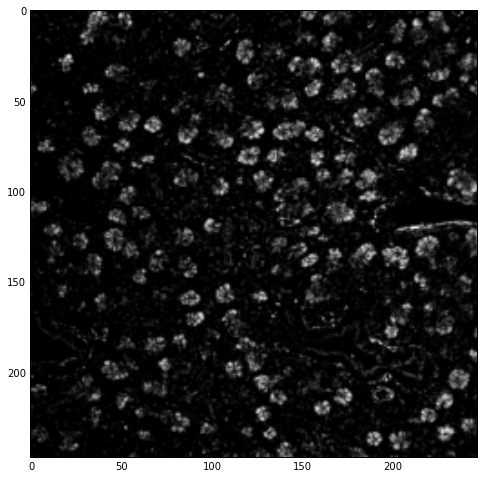

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img_temp, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(img_temp,cmap='gray')

In [ ]:
############## Testing with 60X image ##############

In [13]:
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()

n_clusters = 25  # number of regions
img_temp = img60
X_temp = X60
connectivity_temp = connectivity60

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity_temp)
ward.fit(X_temp)
label = np.reshape(ward.labels_, img_temp.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)


Compute structured hierarchical clustering...
Elapsed time:  7.467785835266113
Number of pixels:  61009
Number of clusters:  25


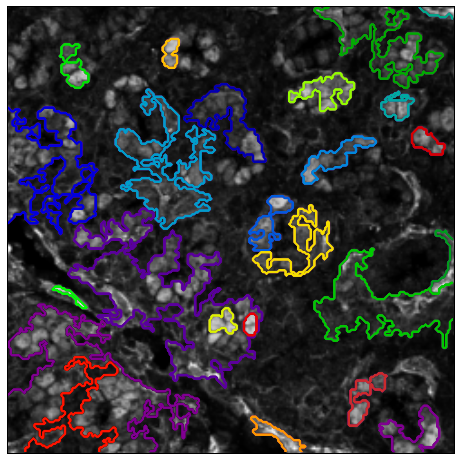

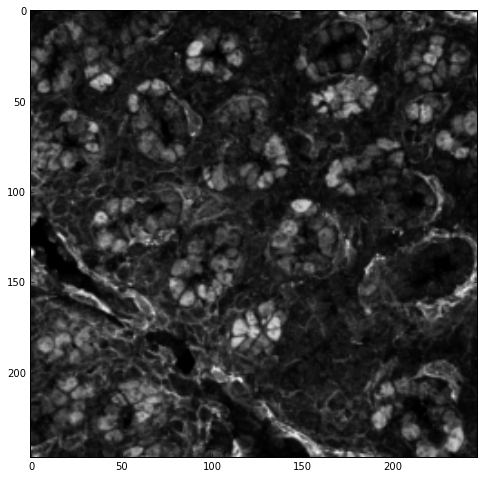

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(img_temp, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(img_temp,cmap='gray')

In [ ]:
#############Distance Map###############

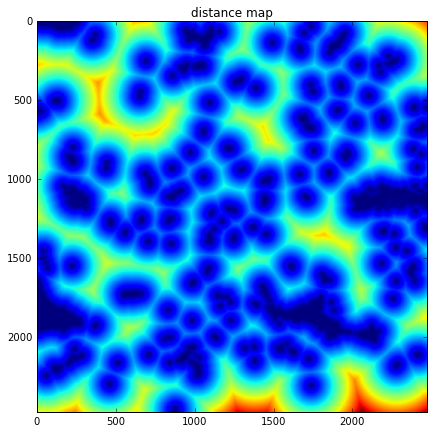

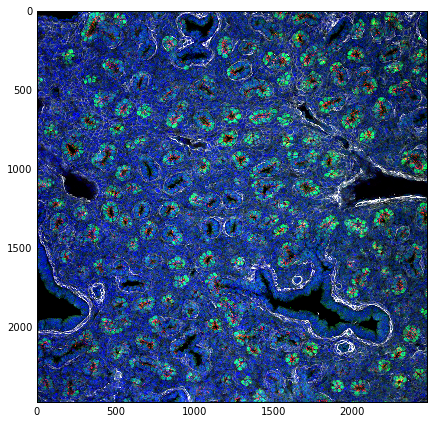

In [5]:
# Distance map: calculate distance from point to background

image3 = img_as_float(io.imread('G:\\2016\\Summer\\LungMAP\\Image_data\\E16.5\\2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_003.tif'))

image3_gray=rgb2gray(image3)

distance1 = ndimage.distance_transform_edt(image3_gray, return_distances=True, return_indices=False)

plt.figure(figsize=(24, 7))
plt.imshow(distance1, interpolation='nearest')
plt.axis('on')
plt.title('distance map')
plt.show()

plt.figure(figsize=(24, 7))
plt.imshow(image3)